# COVID-19 Open Research Dataset Challenge (CORD-19)

To get all the papers go here:
https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

# Parsing docs

In [1]:
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np
# If you need to parse docs of differend kind than JSON, use the libraries below:
# import cv2
# import fitz
# import docx2txt
# import textract
# import pytesseract

print("Python libraries have been imported.")

Python libraries have been imported.


In [2]:
class Parser:
    def __init__(self, path):
        self.path = path
        
#     def readExcel(self, path):
#         xls = pd.read_excel(path)
#         return xls.to_string()

    # Jsons from COVID competition
    def readJson(self, path):
        json_text = ""
        with open(path) as file:
            paper_in_json = json.load(file)
            text_list = paper_in_json['body_text']
            if len(text_list) > 0:
                for text_dict in text_list:
                    json_text += text_dict['text']+" "  
        return json_text   

    def readExcel(self, path):
        xls = pd.read_excel(path, None)
        xls_text = ''
        for df in xls.values():
            xls_text += df.to_string()+" "
        return xls_text    
    
    def readImg(self, path):
        img = cv2.imread(path)
        return pytesseract.image_to_string(img)
    
    def readTxt(self, path):
        text = ''
        with open(path,'r') as f:
            text = f.read()
        return text
    
    def readPdf(self, path):
        doc = fitz.open(path)
        text = ''
        for page in doc:
            text += page.getText("text")+" "
        return text
    
    def readDocx(self, path):
        text = docx2txt.process(path,img_dir=
                                'imgs_from_docs')
        return text
    
    def readDoc(self, path):
        text = textract.process(path).decode('utf-8')
        return text

    def readFiles(self):
        text_list = []
        for root, dirs, files in os.walk(self.path):
            for filename in files:
                if not filename.startswith('._'):         
                    if Path(filename).suffix.lower() in ['.jpg', '.png','.jpeg']:
                        print('Parsing doc: ',filename)
                        text = self.readImg(os.path.join(root, filename))
                        if text.strip() != '':
                            text_list.append({'title':filename,'content':text})
                            # print(text)
                    if Path(filename).suffix.lower() in ['.xls','.xlsx']:
                        print('Parsing doc: ',filename)
                        text = self.readExcel(os.path.join(root, filename))
                        if text.strip() != '':
                            text_list.append({'title':filename,'content':text})
                            # print(text)
                    if Path(filename).suffix.lower() == '.txt':
                        print('Parsing doc: ',filename)
                        text = self.readTxt(os.path.join(root, filename))
                        if text.strip() !=  '':
                            text_list.append({'title':filename,'content':text})
                            # print(text)   
                    if Path(filename).suffix.lower() == '.pdf':
                        print('Parsing doc: ',filename)
                        text = self.readPdf(os.path.join(root, filename))
                        if text.strip() !=  '':
                            text_list.append({'title':filename,'content':text})
                            # print(text)    
                    if Path(filename).suffix.lower() == '.docx':
                        print('Parsing doc: ',filename)
                        text = self.readDocx(os.path.join(root, filename))                
                        if text.strip() !=  '':
                            text_list.append({'title':filename,'content':text})
                            # print(text)           
                    if Path(filename).suffix.lower() == '.doc':
                        print('Parsing doc: ',filename)
                        text = self.readDoc(os.path.join(root, filename))                    
                        if text.strip() !=  '':
                            text_list.append({'title':filename,'content':text})
                            # print(text)
                    if Path(filename).suffix.lower() == '.json':
                        print('Parsing doc: ',filename)
                        text = self.readJson(os.path.join(root, filename))
                        if text.strip() !=  '':
                            text_list.append({'title':filename,'content':text})                             
        return text_list

In [3]:
parser = Parser('covid-19-papers')
docs_list = parser.readFiles()
print('All docs have been parsed.')

Parsing doc:  PMC1636417.xml.json
Parsing doc:  PMC1636460.xml.json
Parsing doc:  PMC1635287.xml.json
Parsing doc:  PMC1616946.xml.json
Parsing doc:  PMC2115309.xml.json
Parsing doc:  PMC1994808.xml.json
Parsing doc:  PMC2106561.xml.json
Parsing doc:  PMC1994780.xml.json
Parsing doc:  PMC1807961.xml.json
Parsing doc:  PMC2116283.xml.json
Parsing doc:  PMC1802563.xml.json
Parsing doc:  PMC1934988.xml.json
Parsing doc:  PMC2118498.xml.json
Parsing doc:  PMC2115421.xml.json
Parsing doc:  PMC2115043.xml.json
Parsing doc:  PMC1781101.xml.json
Parsing doc:  PMC2114808.xml.json
Parsing doc:  PMC2114809.xml.json
Parsing doc:  PMC2115162.xml.json
Parsing doc:  PMC2018615.xml.json
Parsing doc:  PMC2116277.xml.json
Parsing doc:  PMC2116293.xml.json
Parsing doc:  PMC2119224.xml.json
Parsing doc:  PMC2115898.xml.json
Parsing doc:  PMC1914094.xml.json
Parsing doc:  PMC1874606.xml.json
Parsing doc:  PMC2115535.xml.json
Parsing doc:  PMC1616953.xml.json
Parsing doc:  PMC2114261.xml.json
Parsing doc:  

In [4]:
for nr, doc in enumerate(docs_list):
    print(nr,doc['title'])

0 PMC1636417.xml.json
1 PMC1636460.xml.json
2 PMC1635287.xml.json
3 PMC1616946.xml.json
4 PMC1994808.xml.json
5 PMC1994780.xml.json
6 PMC1807961.xml.json
7 PMC1802563.xml.json
8 PMC1934988.xml.json
9 PMC2118498.xml.json
10 PMC1781101.xml.json
11 PMC2018615.xml.json
12 PMC1914094.xml.json
13 PMC1874606.xml.json
14 PMC1616953.xml.json
15 PMC1976451.xml.json
16 PMC1933184.xml.json
17 PMC1751549.xml.json
18 PMC1616970.xml.json
19 PMC1636451.xml.json
20 PMC1919510.xml.json
21 PMC2018635.xml.json
22 PMC1669763.xml.json
23 PMC1933182.xml.json
24 PMC1636472.xml.json


In [5]:
print('Number of documents:',len(docs_list))

Number of documents: 25


In [6]:
# title and content of doc no. 0
docs_list[0]

{'title': 'PMC1636417.xml.json',
 'content': "For both surveillance and diagnostic applications, fine-scale pathogen identification and near-neighbor discrimination is important; therefore, an assay that monitors at this very specific level is desirable for many types of samples such as clinical and environmental (1–3). To successfully use any method based on DNA or RNA detection, these assays must be coupled with large databases of nucleic acid sequence information for assay design to ensure that the desired information is provided and for the interpretation of raw data. Several well-established techniques use PCR to amplify individual target pieces of sequenced genomes to provide detection of organisms (4). These methods can roughly be divided into approaches that target individual short sequence lengths or probes (<40 bp) and methods that examine longer probes. The advantage of using short probes is that when the uniqueness of the probe has been assured and unique primers are also s

# Preprocessing

In [7]:
import re
import nltk
#nltk.download()
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
print("Python libraries have been imported.")

Python libraries have been imported.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robert.trypuz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
class TextPreprocessor:
    def __init__(self, docs_list):
        self.docs_list = docs_list
    
    # doc title plays a role of id; in the future doc id should be uuid
    def addField(self, doc_title, field_key, field_value):
        for doc in self.docs_list:
            if doc['title'] == doc_title:
                doc[field_key] = field_value
                break
        
    def wordSentTokenize(self, text):
        return nltk.sent_tokenize(text)
            
    def cleanSentences(self, sentences_list):
        sentences = []
        for sentence in sentences_list:
#             sentence = re.sub(r"that's","that is",sentence)
#             sentence = re.sub(r"there's","there is",sentence)
#             sentence = re.sub(r"what's","what is",sentence)
#             sentence = re.sub(r"where's","where is",sentence)
#             sentence = re.sub(r"it's","it is",sentence)
#             sentence = re.sub(r"who's","who is",sentence)
#             sentence = re.sub(r"i'm","i am",sentence)
#             sentence = re.sub(r"she's","she is",sentence)
#             sentence = re.sub(r"he's","he is",sentence)
#             sentence = re.sub(r"they're","they are",sentence)
#             sentence = re.sub(r"who're","who are",sentence)
#             sentence = re.sub(r"ain't","am not",sentence)
#             sentence = re.sub(r"wouldn't","would not",sentence)
#             sentence = re.sub(r"shouldn't","should not",sentence)
#             sentence = re.sub(r"can't","can not",sentence)
#             sentence = re.sub(r"couldn't","could not",sentence)
#             sentence = re.sub(r"won't","will not",sentence)
            sentence = re.sub(r"\W"," ",sentence) # non-word character
            sentence = re.sub(r"\d"," ",sentence) # digit character
            sentence = re.sub(r"nan"," ",sentence)
            sentence = re.sub(r"NaN"," ",sentence)  
#             sentence = re.sub(r"is"," ",sentence)
#             sentence = re.sub(r"IS"," ",sentence)
#             sentence = re.sub(r"for"," ",sentence)
#             sentence = re.sub(r"the"," ",sentence)
#             sentence = re.sub(r"unnamed"," ",sentence)
#             sentence = re.sub(r"yes"," ",sentence)
#             sentence = re.sub(r"Yes"," ",sentence)
#             sentence = re.sub(r"no"," ",sentence)
#             sentence = re.sub(r"No"," ",sentence)
#             sentence = re.sub(r"com"," ",sentence)
#             sentence = re.sub(r"Com"," ",sentence)
#             sentence = re.sub(r"COM"," ",sentence)
            sentence = re.sub(r"_"," ",sentence)
            sentence = re.sub(r"\s+[a-z]\s+"," ",sentence) # clean a whitespace
            sentence = re.sub(r"\s+[a-z]$"," ",sentence)
            sentence = re.sub(r"^[a-z]\s+"," ",sentence)
            sentence = re.sub(r"\s+"," ",sentence)           
            sentences.append(sentence.strip())
        return sentences
    
    def wordTokenizeCorpus(self, sentences_list):
        return  [nltk.word_tokenize(sentence) for sentence in sentences_list]

    def getWordnetPos(self, word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}    
        return tag_dict.get(tag, wordnet.NOUN)

    def lemamatizePosSensitive(self, sentences_list):
        lemmatizer = WordNetLemmatizer()
        sentences = []
        for sentence in sentences_list:
            sentences.append([lemmatizer.lemmatize(word, self.getWordnetPos(word)) 
                              for word in sentence])
        return sentences
    
    def lemmatizeWords(self, sentences_list):
        lemmatizer = WordNetLemmatizer()
        sentences = []
        for sentence in sentences_list:
            words = [lemmatizer.lemmatize(word) for word in sentence]
            sentences.append(words)
        return sentences
            
    
    def removeStopwords(self, sentences_list):
        sentences = []
        for sentence in sentences_list:
            words = [word for word in sentence if word.lower() not in stopwords.words('english')]
            sentences.append(words)
        return sentences

    def posTagging(self, sentences_list):
        sentences = []
        for sentence in sentences_list:
            pos = nltk.pos_tag(sentence)
            sentences.append(pos)
        return sentences
    
    def regognizeNamedEntities(self, sentences_list_with_pos_tags):
        sentences = []
        for sentence in sentences_list_with_pos_tags:
            ne = nltk.ne_chunk(sentence)
            sentences.append(ne)
        return sentences

In [9]:
text_preprocessor = TextPreprocessor(docs_list)
print('Preprocessing has been initiated.')
for doc in docs_list:
    text_preprocessor.addField(doc['title'],
                              'content_sent_tokenized',
                              text_preprocessor.wordSentTokenize(doc['content']))  

    text_preprocessor.addField(doc['title'],
                              'clean_content_sent_tokenized',
                              text_preprocessor.cleanSentences(doc['content_sent_tokenized']))  

    text_preprocessor.addField(doc['title'],
                              'content_word_tokenized',
                              text_preprocessor.wordTokenizeCorpus(doc['clean_content_sent_tokenized']))  

    text_preprocessor.addField(doc['title'],
                              'lemmatized',
                              text_preprocessor.lemamatizePosSensitive(doc['content_word_tokenized']))  

    text_preprocessor.addField(doc['title'],
                              'no_stopwords',
                              text_preprocessor.removeStopwords(doc['lemmatized']))  

    text_preprocessor.addField(doc['title'],
                              'pos_tagged',
                              text_preprocessor.posTagging(doc['no_stopwords']))  
    
    text_preprocessor.addField(doc['title'],
                             'ne_tagged',
                             text_preprocessor.regognizeNamedEntities(doc['pos_tagged']))

print('Preprocessing accomplished! Be patient, it may take a while.')

Preprocessing has been initiated.
Preprocessing accomplished! Be patient, it may take a while.


In [10]:
print(docs_list[0]['title'])

PMC1636417.xml.json


In [11]:
print(docs_list[0]['content'])

For both surveillance and diagnostic applications, fine-scale pathogen identification and near-neighbor discrimination is important; therefore, an assay that monitors at this very specific level is desirable for many types of samples such as clinical and environmental (1–3). To successfully use any method based on DNA or RNA detection, these assays must be coupled with large databases of nucleic acid sequence information for assay design to ensure that the desired information is provided and for the interpretation of raw data. Several well-established techniques use PCR to amplify individual target pieces of sequenced genomes to provide detection of organisms (4). These methods can roughly be divided into approaches that target individual short sequence lengths or probes (<40 bp) and methods that examine longer probes. The advantage of using short probes is that when the uniqueness of the probe has been assured and unique primers are also selected, this method gives good specificity. T

In [12]:
for number, sentence in enumerate(docs_list[0]['clean_content_sent_tokenized']):
    print(str(number+1)+'.', sentence)

1. For both surveillance and diagnostic applications fine scale pathogen identification and near neighbor discrimination is important therefore an assay that monitors at this very specific level is desirable for many types of samples such as clinical and environmental
2. To successfully use any method based on DNA or RNA detection these assays must be coupled with large databases of nucleic acid sequence information for assay design to ensure that the desired information is provided and for the interpretation of raw data
3. Several well established techniques use PCR to amplify individual target pieces of sequenced genomes to provide detection of organisms
4. These methods can roughly be divided into approaches that target individual short sequence lengths or probes bp and methods that examine longer probes
5. The advantage of using short probes is that when the uniqueness of the probe has been assured and unique primers are also selected this method gives good specificity
6. This appr

In [13]:
for number, sentence in enumerate(docs_list[0]['no_stopwords']):
    print(str(number+1)+'.', sentence)
    

1. ['surveillance', 'diagnostic', 'application', 'fine', 'scale', 'pathogen', 'identification', 'near', 'neighbor', 'discrimination', 'important', 'therefore', 'assay', 'monitor', 'specific', 'level', 'desirable', 'many', 'type', 'sample', 'clinical', 'environmental']
2. ['successfully', 'use', 'method', 'base', 'DNA', 'RNA', 'detection', 'assay', 'must', 'couple', 'large', 'database', 'nucleic', 'acid', 'sequence', 'information', 'assay', 'design', 'ensure', 'desire', 'information', 'provide', 'interpretation', 'raw', 'data']
3. ['Several', 'well', 'establish', 'technique', 'use', 'PCR', 'amplify', 'individual', 'target', 'piece', 'sequence', 'genome', 'provide', 'detection', 'organism']
4. ['method', 'roughly', 'divide', 'approach', 'target', 'individual', 'short', 'sequence', 'length', 'probe', 'bp', 'method', 'examine', 'longer', 'probe']
5. ['advantage', 'use', 'short', 'probe', 'uniqueness', 'probe', 'assure', 'unique', 'primer', 'also', 'select', 'method', 'give', 'good', 'speci

# Corpus of documents

In [14]:
class CorpusCreator:
    
    def __init__(self,docs_list):
        self.docs_list = docs_list
        
    def createCorpus(self, doc_field_key):
        corpus = []
        sentence_dict = {}
        doc_nr = 0
        sentence_nr = 0
        for doc in docs_list:    
            for sentence in doc[doc_field_key]: 
                sentence_dict[sentence_nr] = doc_nr  
                corpus.append(' '.join(sentence))
                sentence_nr += 1
            doc_nr += 1
        return corpus, sentence_dict
    
corpus_creator = CorpusCreator(docs_list)

corpus_sentences, sentence_dict = corpus_creator.createCorpus('no_stopwords')

corpus = []
for doc in docs_list:
    doc_content = ""
    for sentence_list in doc['no_stopwords']:
        doc_content += " ".join(sentence_list)+ " "
    corpus.append(doc_content.strip())    

In [15]:
print(corpus[0])

surveillance diagnostic application fine scale pathogen identification near neighbor discrimination important therefore assay monitor specific level desirable many type sample clinical environmental successfully use method base DNA RNA detection assay must couple large database nucleic acid sequence information assay design ensure desire information provide interpretation raw data Several well establish technique use PCR amplify individual target piece sequence genome provide detection organism method roughly divide approach target individual short sequence length probe bp method examine longer probe advantage use short probe uniqueness probe assure unique primer also select method give good specificity approach capable provide fine scale identification several genetically close organism select sufficient number probe However rapidly lead large number total probe require detect organism interest addition select probe initial selection process determine unique often later found less spe

In [16]:
for nr, setentence in enumerate(corpus_sentences):
    if sentence_dict[nr] == 11:
        print(str(nr)+' <--', setentence)


2075 <-- programmed ribosomal frameshift PRF non conventional translation phenomenon pertains particular change reading frame messenger RNA mRNA induced stimulatory signal
2076 <-- strategy mainly use virus synthesize precursor enzyme maintain specific ratio structural enzymatic protein
2077 <-- addition PRF use translation prokaryotic eukaryotic mRNAs
2078 <-- One best know example PRF occurs ribosome translate full length mRNA human immunodeficiency virus type HIV
2079 <-- PRF induced two ci element within mRNA slippery heptanucleotide X XXY YYZ X nucleotide either U Z G eukaryote space indicate initial reading frame PRF occurs follow specific RNA secondary structure call stimulatory signal
2080 <-- RNA structure often pseudoknot also stem loop case HIV three way stem loop found bacterial insertion sequence
2081 <-- stimulatory signal control PRF efficiency make ribosome pause slippery sequence
2082 <-- However pause sufficient promote PRF propose stimulatory signal specific interact

2207 <-- result confirm exchange slippery sequence alters PRF efficiency addition show extent decrease depends upon whether extend slippery sequence classic slippery sequence exchange
2208 <-- result also confirm importance position BC PRF
2209 <-- also attempt identify rRNA mutant could interfere PRF HIV
2210 <-- far rRNA mutation found influence PRF perturb accommodation process
2211 <-- aim select mutation influence PRF affect E site tRNA binding since found mutation E site codon alter PRF
2212 <-- strategy consist use bacterial ribosome introduce random mutation rRNA high mutation rate E coli XL Red mutator strain see Materials Methods section detail
2213 <-- pool randomly mutate plasmid obtain clone analyse contain mutation rRNA
2214 <-- rRNA random library clone plasmid contain reporter gene cod RFP GFP RFP express conventional translation whereas GFP expression require PRF HIV
2215 <-- RBS reporter MBS site rRNA random library mutate remain complementary reporter exclusively tra

# Words embeddings

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
word_count_vector = count_vectorizer.fit_transform(corpus)

In [18]:
# Extract the vocabulary and display it
vocabulary = np.array(count_vectorizer.get_feature_names())
print("\nVocabulary:\n", vocabulary[:99])
print()
print('Shape of vocabulary:',vocabulary.shape)
print()


Vocabulary:
 ['aa' 'aaa' 'aaaccatggtactgcgatc' 'aac' 'aag' 'aat' 'aatacggtccctact'
 'aau' 'ab' 'abacus' 'abandon' 'abasic' 'abbreviate' 'abc' 'abcc'
 'aberrant' 'abi' 'ability' 'ablation' 'able' 'abnormal' 'abolish'
 'abrogate' 'abruptly' 'absence' 'absent' 'absolute' 'absolutely' 'absorb'
 'absorbance' 'absorbed' 'absorption' 'abstract' 'abundance' 'abundant'
 'aca' 'acaacacgtttagcctgacc' 'acc' 'accelerate' 'accept' 'accepted'
 'acceptor' 'access' 'accessibility' 'accessible' 'accession' 'accessory'
 'accommodate' 'accommodation' 'accompany' 'accomplish' 'accomplishment'
 'accord' 'accordance' 'accordingly' 'account' 'accounting' 'accumulate'
 'accumulates' 'accumulating' 'accumulation' 'accuracy' 'accurate'
 'accurately' 'ace' 'acetate' 'acetic' 'acetone' 'acetonitrile'
 'acggacatttcg' 'achievable' 'achieve' 'achievement' 'achieving' 'acid'
 'acidic' 'acon' 'acp' 'acquire' 'acquisition' 'across' 'acrylamide' 'act'
 'action' 'activate' 'activation' 'activator' 'active' 'actively'
 'a

In [19]:
# Create a vector by passing the text into the vectorizer to get back counts
word_count_vector

# Our final vector:
print('Full vector: ')
print(word_count_vector.toarray())
print('Shape of vector:',word_count_vector.toarray().shape)
print()

Full vector: 
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of vector: (25, 6370)



In [20]:
word_count_vector.toarray()[11][0:510]

array([10,  1,  0,  3,  0,  0,  0,  5,  0,  0,  0,  0,  0,  5,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  5,  0,  0,
        0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  5,  1,
        0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  2,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 12,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0, 17,  0,  7,  0,
        1,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [21]:
word = 'virus'
word_index = np.where(vocabulary==word)[0][0]
doc_nr = 11
print('Word \"',word,'\" appears',word_count_vector.toarray()[doc_nr][word_index],'times in the doc',doc_nr)

Word " virus " appears 12 times in the doc 11


In [22]:
# Count how many times word "virus" appears in the documents
word_count_vector.toarray()[:,word_index]

array([ 9,  1, 40,  0, 39,  0,  0,  6,  9,  5, 27, 12,  1, 15,  1,  2,  1,
        0, 30,  2,  0,  0,  6,  4,  0])

In [23]:
# Doc nr 2 (we start counting from "0"!) is full of "viruses" ;-) Check yourself
print(docs_list[2]['title'])
print()
print(docs_list[2]['content'])

PMC1635287.xml.json

RNA viruses, including coronaviruses, encode a group of structural phosphoproteins with basic patches on their surface. As a pivotal structural component of the virion, this group of proteins plays essential roles in packaging the RNA genome to form a ribonucleoprotein (RNP) complex resulting from assembly of the viral RNA and multiple copies of the (nucleo)capsid protein. A detailed dissection and characterization of the intrinsic RNA-binding properties of these proteins are thus essential for understanding several important processes in the life cycle of RNA viruses, including assembly of the nucleocapsid, the specific encapsidation of viral RNA and morphogenesis of virions. In this study, amino acid residues in the N-terminal domain of the nucleocapsid (N) protein of a coronavirus that are critical for its RNA-binding activity are identified and their roles in viral infectivity are analyzed, using site-directed mutagenesis based on our previous structural studie

# Cosine similarity
- [What is a cosine similarity matrix?](https://medium.com/acing-ai/what-is-cosine-similarity-matrix-f0819e674ad1)
- [Machine Learning :: Cosine Similarity for Vector Space Models (Part III)](http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)
- [Plot of cos x](https://pl.wikipedia.org/wiki/Funkcje_trygonometryczne#/media/Plik:Cos_proportional.svg)

In [24]:
# Let's find docs similar to the doc no. 2
from sklearn.metrics.pairwise import cosine_similarity
import heapq

cosine_similarity(word_count_vector,word_count_vector[2])

array([[0.15094335],
       [0.15315763],
       [1.        ],
       [0.153413  ],
       [0.24265409],
       [0.15069377],
       [0.21260077],
       [0.16038297],
       [0.16880613],
       [0.25720911],
       [0.13794949],
       [0.21928365],
       [0.29726208],
       [0.20027931],
       [0.30528945],
       [0.21981989],
       [0.18471829],
       [0.16147375],
       [0.49377355],
       [0.21076306],
       [0.28578879],
       [0.47563728],
       [0.20259825],
       [0.18226817],
       [0.19567734]])

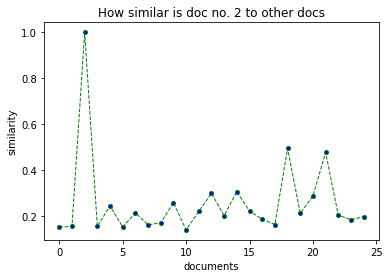

In [25]:
# Let's plot it!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

doc_nr = 2
data = cosine_similarity(word_count_vector,word_count_vector[doc_nr])

doc_similarity = pd.DataFrame({'docs':[item for item in range(0,len(data))],
                             'score':[score[0] for score in data]})
# naming the x axis 
plt.xlabel('documents') 
# naming the y axis 
plt.ylabel('similarity') 
# giving a title to my graph 
plt.title('How similar is doc no. '+str(doc_nr)+' to other docs') 
plt.plot(data, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=4) 
#plt.scatter(doc_similarity['docs'],doc_similarity['score'])
plt.show()

In [26]:
# Top 5 similar to doc no. 2. Of course 2 is most simialrt to itself, no surprise!
heapq.nlargest(5, enumerate(cosine_similarity(word_count_vector,word_count_vector[2])), key=lambda x: x[1])

[(2, array([1.])),
 (18, array([0.49377355])),
 (21, array([0.47563728])),
 (14, array([0.30528945])),
 (12, array([0.29726208]))]

# From text to concepts

## Latent Dirichlet Allocation (LDA)

https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158

In [27]:
from sklearn.decomposition import LatentDirichletAllocation

NUM_TOPICS = 5
NUM_TOPICS_ELEMENTS = 10



def print_topics(model, count_vectorizer, top_n=10):
    lda_dict = {}
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        topic_members_weights = [(count_vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]
        print(topic_members_weights)   

        topic_members = []
        for element in topic_members_weights[:NUM_TOPICS_ELEMENTS]:
            topic_members.append(element[0])
        lda_dict[idx] = topic_members                   
        print()
    return lda_dict
        
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, 
                                      max_iter=15, 
                                      learning_method='online')
lda_Z = lda_model.fit_transform(word_count_vector)
# print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

print("LDA Model:")
# print_topics(lda_model, count_vectorizer)

lda_dict = print_topics(lda_model, count_vectorizer)
print_topics(lda_model, count_vectorizer)

LDA Model:
Topic 0:
[('base', 63.5511034235865), ('simulation', 33.92702856977487), ('position', 28.96142794550962), ('structure', 26.351593241571972), ('hydrogen', 25.050559510587156), ('bond', 21.597450524812277), ('anticodon', 21.52416961590458), ('type', 19.19369837085992), ('water', 18.849570767941522), ('modify', 18.825015516011227)]

Topic 1:
[('pcr', 466.9489397167446), ('use', 373.96378019336), ('sequence', 370.71230462628785), ('rna', 225.86277667399852), ('figure', 225.65714914899704), ('protein', 208.77765882259703), ('site', 201.7074936411588), ('sample', 197.75050966812987), ('probe', 188.64258556735285), ('mutation', 185.78733447472777)]

Topic 2:
[('trx', 134.33126796930108), ('cd', 100.88335085278402), ('cell', 92.35440672014174), ('signal', 85.82499868761822), ('prf', 71.7894061268765), ('figure', 60.11730820188047), ('genome', 58.62975464340464), ('protein', 47.68103149067885), ('surface', 45.44740748479866), ('disulfide', 44.40624015969484)]

Topic 3:
[('pcr', 4.336

{0: ['base',
  'simulation',
  'position',
  'structure',
  'hydrogen',
  'bond',
  'anticodon',
  'type',
  'water',
  'modify'],
 1: ['pcr',
  'use',
  'sequence',
  'rna',
  'figure',
  'protein',
  'site',
  'sample',
  'probe',
  'mutation'],
 2: ['trx',
  'cd',
  'cell',
  'signal',
  'prf',
  'figure',
  'genome',
  'protein',
  'surface',
  'disulfide'],
 3: ['pcr',
  'sequence',
  'use',
  'tag',
  'tnt',
  'figure',
  'gene',
  'probe',
  'target',
  'chip'],
 4: ['cell',
  'pmo',
  'sequence',
  'use',
  'sars',
  'conjugate',
  'figure',
  'proseq',
  'structure',
  'fig']}

In [28]:
# Let's chcek what is a topic of doc 2:
print('Topic',lda_Z[2].argmax())
print(lda_Z[2])

Topic 1
[7.06108265e-05 9.99717418e-01 7.09319817e-05 6.99246187e-05
 7.11141215e-05]


In [29]:
# Doc 18 was second most similar to 2. Will it have the same topic?
print('Topic',lda_Z[18].argmax())
print(lda_Z[18])

Topic 1
[9.90119397e-05 9.99602281e-01 1.00486927e-04 9.82261309e-05
 9.99940818e-05]


# Search

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer_new = CountVectorizer()
word_count_vector_new = count_vectorizer_new.fit_transform(corpus_sentences)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector_new)
tf_idf_corpus_vector = tfidf_transformer.transform(word_count_vector_new)

In [32]:
from termcolor import colored, cprint

def print_results(dictionary):
#     dict(sorted(dictionary.items()))
    for key in dictionary.keys():
        print()
        cprint('TOPIC '+str(key)+" "+str(lda_dict[key]),on_color="on_yellow")
        
        for result in dictionary[key]:
            print('  ',result[0])
            print('     ',colored(str(result[2])+". "+result[1], 'cyan'))
    
       
while True:
   cprint(144*'*',color="green")
   # get a search phrase to extract keywords from
   search_phrase = input('Search documents or \'0\' to stop:  ')
   
   preprocessed_search_phrase = text_preprocessor.removeStopwords(
       text_preprocessor.lemamatizePosSensitive(
           text_preprocessor.wordTokenizeCorpus(
               text_preprocessor.cleanSentences(
                   text_preprocessor.wordSentTokenize(search_phrase)))))[0]
   
   if search_phrase == '0':
       break
   else:
                
        #generate tf-idf for the given search phrase
        tf_idf_vector=tfidf_transformer.transform(count_vectorizer_new.transform([" ".join(preprocessed_search_phrase)]))
                       
        query_sim = cosine_similarity(tf_idf_corpus_vector,tf_idf_vector)
        
        if query_sim.max() == 0.0:
            print('NO RESULTS')
        else:
            nr = 1
            results = {}
            for sentence_nr in heapq.nlargest(50, 
                                              enumerate(query_sim), 
                                              key=lambda x: x[1]):
                topic_nr = lda_Z[sentence_dict[sentence_nr[0]]].argmax()
                doc_title = docs_list[sentence_dict[sentence_nr[0]]]['title']
                if topic_nr in results.keys():
                    results[topic_nr].append([str(sentence_dict[sentence_nr[0]])+'. '+docs_list[sentence_dict[sentence_nr[0]]]['title'],corpus_sentences[sentence_nr[0]],sentence_nr[0]])
                else:
                    results[topic_nr] = []
                    results[topic_nr].append([str(sentence_dict[sentence_nr[0]])+'. '+docs_list[sentence_dict[sentence_nr[0]]]['title'],corpus_sentences[sentence_nr[0]],sentence_nr[0]])
                    
            print_results(results)    
#                 print(str(nr)+'.',
#                       docs_list[sentence_dict[sentence_nr[0]]]['title'], 
#                       '( Topic',lda_Z[sentence_dict[sentence_nr[0]]].argmax(),')')
#                 print('  ',colored(corpus_sentences[sentence_nr[0]], 'yellow'))
#                 nr += 1
                
        input('Press ENTER')

************************************************************************************************************************************************
Search documents or '0' to stop:  Covid
NO RESULTS
Press ENTERhydrogen
************************************************************************************************************************************************
Search documents or '0' to stop:  hydrogen

TOPIC 0 ['base', 'simulation', 'position', 'structure', 'hydrogen', 'bond', 'anticodon', 'type', 'water', 'modify']
   1. PMC1636460.xml.json
      310. Simulations contain mcm U seem lose U NH hydrogen bond U P simulation lack modification position close form hydrogen bond simulation time
   1. PMC1636460.xml.json
      374. bulky modification contain hydrogen bond donor acceptor may act sterically restrict movement discourage displacement U weak stack interaction stabilize position hydrogen bond contact across loop
   1. PMC1636460.xml.json
      373. modification remove base longer ent

Press ENTER
************************************************************************************************************************************************
Search documents or '0' to stop:  hydrogen BLAST

TOPIC 4 ['cell', 'pmo', 'sequence', 'use', 'sars', 'conjugate', 'figure', 'proseq', 'structure', 'fig']
   17. PMC1751549.xml.json
      3063. Sequence neighbor identify BLAST link Conserved Domain Database CDD RPS BLAST algorithm
   0. PMC1636417.xml.json
      183. Filtering necessary send HybSeq ProSeq BLAST single query bias score strain insertion deletion relative ProSeq especially use BLAST parameter maximize use base call
   0. PMC1636417.xml.json
      22. REPI program use BLAST default setting would return sequence might represent hybridization expect value quantity calculate BLAST program indicates likelihood sequence match found would occur random chance database
   17. PMC1751549.xml.json
      3095. Related Structures link provide one similar protein know structure iden

Press ENTER
************************************************************************************************************************************************
Search documents or '0' to stop:  0


# Zadanie domowe